<a href="https://colab.research.google.com/github/JonaBaron/TensorFlow/blob/main/03_Computer_vison_%26_convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to convolution neural network and computer vision with TF

##Get the data

In [3]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2025-01-08 02:00:05--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.65.123, 172.217.15.251, 172.217.164.27, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.65.123|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.2’

pizza_steak.zip.2   100%[===================>] 104.47M   259MB/s    in 0.4s    

2025-01-08 02:00:05 (259 MB/s) - ‘pizza_steak.zip.2’ saved [109540975/109540975]



## Inspect the data

In [4]:
!ls pizza_steak

test  train


In [5]:
!ls pizza_steak/train

pizza  steak


In [6]:
!ls pizza_steak/train/steak/

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [7]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


##To visualize our images let's get class names

In [10]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [12]:
# Let's look at the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


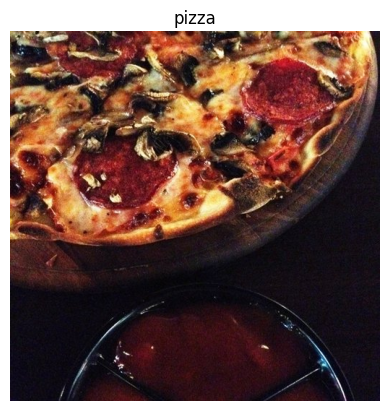

In [32]:
# View a random image from steak
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [33]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[177, 157,  86],
        [173, 153,  84],
        [177, 156,  91],
        ...,
        [ 21,  17,  31],
        [ 29,  21,  36],
        [ 36,  28,  41]],

       [[182, 163,  94],
        [186, 167,  99],
        [195, 175, 112],
        ...,
        [ 28,  22,  36],
        [ 33,  25,  38],
        [ 37,  29,  42]],

       [[184, 167,  98],
        [180, 162,  96],
        [177, 161,  99],
        ...,
        [ 31,  25,  39],
        [ 35,  27,  40],
        [ 36,  26,  37]],

       ...,

       [[ 32,  22,  49],
        [ 23,  13,  38],
        [ 15,   6,  33],
        ...,
        [ 19,  11,  32],
        [ 16,   8,  31],
        [ 18,  10,  33]],

       [[ 29,  18,  48],
        [ 22,  12,  39],
        [ 18,   9,  38],
        ...,
        [ 21,  13,  34],
        [ 20,  10,  34],
        [ 17,   7,  31]],

       [[ 20,   9,  39],
        [ 15,   4,  34],
        [ 14,   5,  34],
        ...,
        [ 24,  16,  3

In [34]:
# View the image shape
img.shape # return width, height, color chanel

(512, 512, 3)

In [37]:
# Get all the pixel values normalize
img/255

array([[[0.69411765, 0.61568627, 0.3372549 ],
        [0.67843137, 0.6       , 0.32941176],
        [0.69411765, 0.61176471, 0.35686275],
        ...,
        [0.08235294, 0.06666667, 0.12156863],
        [0.11372549, 0.08235294, 0.14117647],
        [0.14117647, 0.10980392, 0.16078431]],

       [[0.71372549, 0.63921569, 0.36862745],
        [0.72941176, 0.65490196, 0.38823529],
        [0.76470588, 0.68627451, 0.43921569],
        ...,
        [0.10980392, 0.08627451, 0.14117647],
        [0.12941176, 0.09803922, 0.14901961],
        [0.14509804, 0.11372549, 0.16470588]],

       [[0.72156863, 0.65490196, 0.38431373],
        [0.70588235, 0.63529412, 0.37647059],
        [0.69411765, 0.63137255, 0.38823529],
        ...,
        [0.12156863, 0.09803922, 0.15294118],
        [0.1372549 , 0.10588235, 0.15686275],
        [0.14117647, 0.10196078, 0.14509804]],

       ...,

       [[0.1254902 , 0.08627451, 0.19215686],
        [0.09019608, 0.05098039, 0.14901961],
        [0.05882353, 0

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Create image data generator
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from dir and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (Tiny VGG)

model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 111s 2s/step - accuracy: 0.5768 - loss: 0.6710 - val_accuracy: 0.7040 - val_loss: 0.5604
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.7810 - loss: 0.4881 - val_accuracy: 0.8180 - val_loss: 0.3969
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
